In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## Data load

In [2]:
import pandas as pd

DATA_PATH = "/kaggle/input/nlp-getting-started/"

In [6]:
train = pd.read_csv(DATA_PATH + "train.csv")
test =pd.read_csv(DATA_PATH + "test.csv")

train.shape, test.shape

((7613, 5), (3263, 4))

## mission
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [4]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [10]:
test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [11]:
train.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

## Plan

- 텍스트 데이터 수집 (ex. 크롤링)
- 텍스트 전처리 (ex. 특수문자 삭제, 어근 추출 등)
 + URL 해당하는 글자 지우기
 + HTML 에 해당하는 글자 지우기
 + 이모티콘 지우기
 + 특수 문자 공백으로 바꾸기
 + 기호 지우기
 + 대문자 소문자로 변환
 + 불용어 지우기
- 문자를 숫자로 전환 (ex. Count, TF-IDF)
 + Scikit-Learn 라이브러리
 + CountVectorizer : 각각의 텍스트 데이터를 분할해 단순하게 몇번 나왔는지 숫자를 세는 개념
 + TfidfVectorizer : Term Frequerncy-Inverse Document Frequency
  ++ 단어의 빈도와 역 문서(문장) 빈도를 사용해 문서(문장)내의 단어마다 가중치를 부여
- 머신러닝 모델 학습 및 평가
 + 평가
  ++ 혼동행렬 (Confusion Matrix)
 ++ 정확도 (Accuracy)
 ++ 정밀도 (Precision)
 ++ 재현율 (Recall)
 ++ F1 Score
 ++ AUC

## 탐색적 지표 분석
- 종속변수 : target

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Not Real News (0) / Real News (1)
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

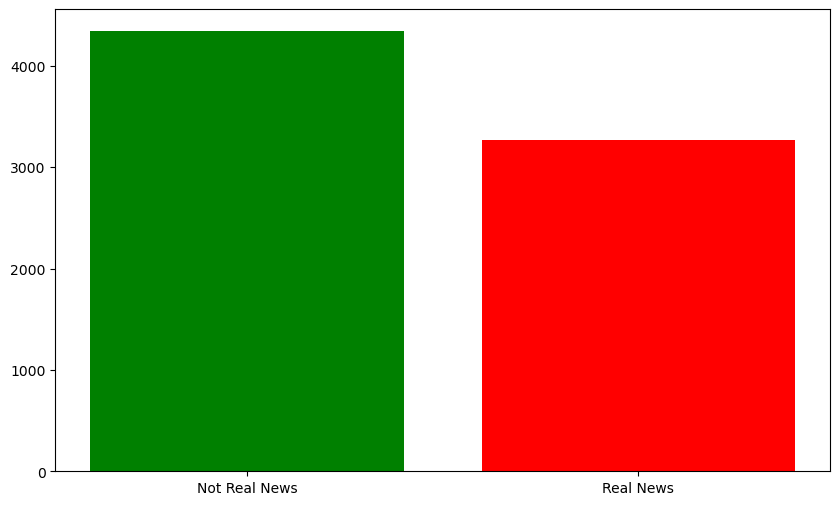

In [33]:
news_class = train["target"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
labels = ["Not Real News", "Real News"]
ax.bar(labels, news_class, color=["g", "r"])
plt.show()

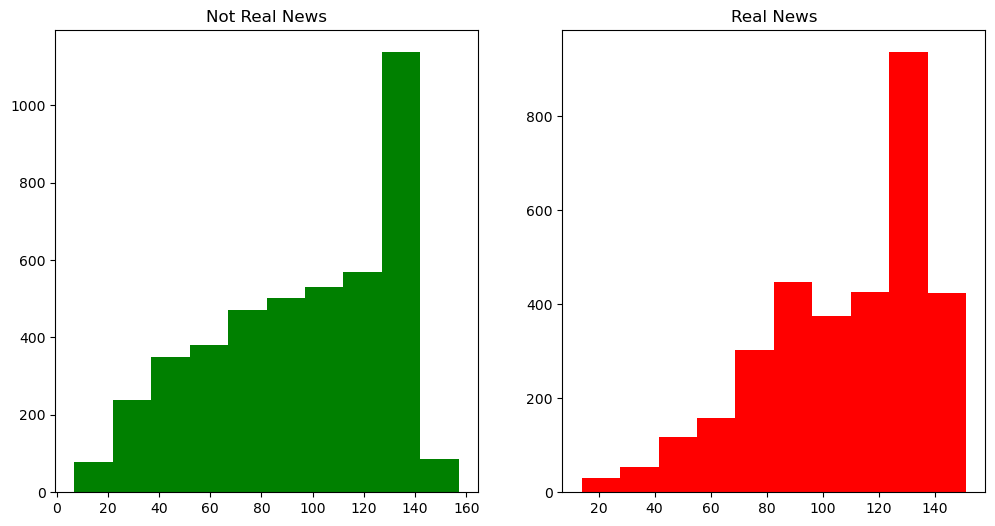

In [45]:
not_real_news_len = train[train["target"]==0]["text"].str.len()
real_news_len = train[train["target"]==1]["text"].str.len()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].hist(not_real_news_len, color= "g")
ax[0].set_title("Not Real News")
ax[1].hist(real_news_len, color= "r")
ax[1].set_title("Real News")

plt.show()

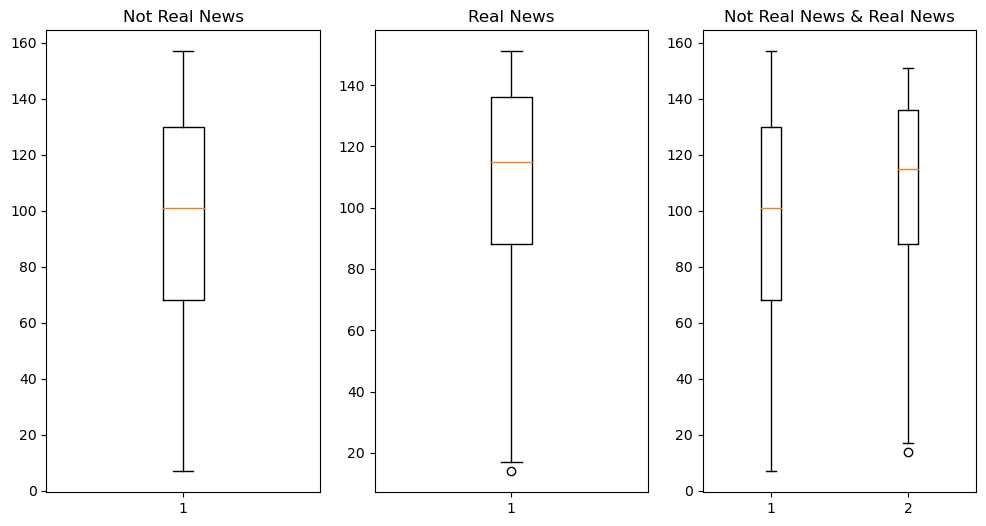

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

ax[0].boxplot(not_real_news_len)
ax[0].set_title("Not Real News")
ax[1].boxplot(real_news_len)
ax[1].set_title("Real News")
ax[2].boxplot([not_real_news_len, real_news_len])
ax[2].set_title("Not Real News & Real News")

plt.show()

## 통계검정
- 두 평균의 비교하고자 한다면
 + 대응표본 (의학적으로 많이 쓰임)
 + 독립표본
- 비모수 두 평균 비교

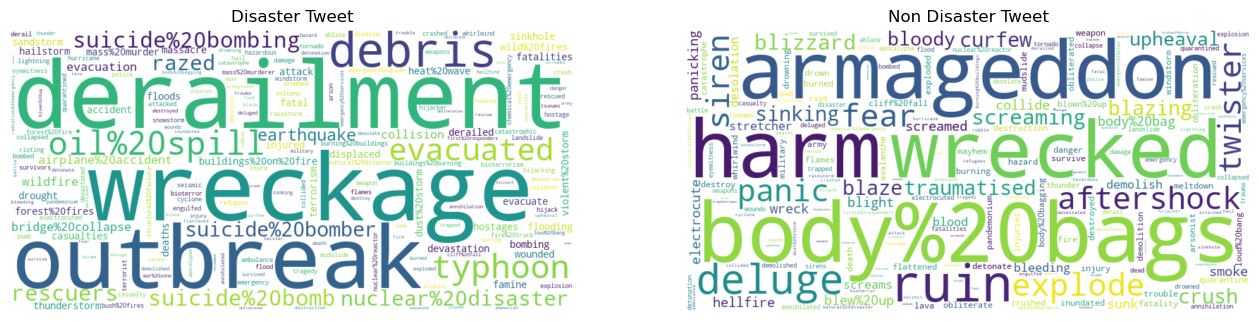

In [55]:
# wordcloud

from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)


fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show()

## 1차 데이터 가공
 - 변수 일부 삭제

In [56]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [58]:
test_id = test["id"]

for data in [train, test]:
    data = data.drop(["id", "keyword", "location"], axis=1, inplace=True)

train.shape, test.shape

((7613, 2), (3263, 1))

In [59]:
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [60]:
test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


## Text Cleansing
- URL 해당하는 글자 지우기
- HTML 에 해당하는 글자 지우기
- 이모티콘 지우기
- 특수 문자 공백으로 바꾸기
- 기호 지우기
- 대문자 소문자로 변환
- 불용어 지우기

In [64]:
import string
import emoji
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [66]:
clean_train_text = [] 
for data in [train, test]:
    data['cleaned_text'] = data['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

In [67]:
train.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


## def 와 lambda
- def 계속 사용하는 함수
- lambda 일회성으로 사용하는 함수에서 많이 사용

In [71]:
# 기초 문법

def totalSum(x, y):
    return x + y

totalSum(1, 2)

3

In [72]:
(lambda x, y: x + y)(1, 2)

3

In [73]:
temp = lambda x : x + 100
temp(5)

105

## text 를 숫자로 변환하는 작업
- CountVectorizer : 한계가 있음. 단어의 중요도가 반영이 안 됨
- **TF-IDF Vectorizer** : 자주 나올 수록 가중치에 패널티를 둬서 오히려 중요도를 낮춤

In [75]:
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']
vector = TfidfVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ngram_range 는 단어를 3개씩 묶어서 그룹해서 보겠다.

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, 
                             ngram_range=(1, 3), max_features = 10000)

X = vectorizer.fit_transform(train['cleaned_text']).todense()

y = train['target'].values

In [79]:
X.shape, y.shape

((7613, 9444), (7613,))

## 데이터셋 분리

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5329, 9444), (2284, 9444), (5329,), (2284,))

## 모델링

In [81]:
# 로지스틱회귀분석으로 예시

from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LogisticRegression(class_weight='balanced')

In [83]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

X_testset = vectorizer.transform(test['cleaned_text']).todense()
print("The Shape of Test Dataset:", X_testset.shape)

y_test_pred = lgs.predict(X_testset)
print("The Predict Value:", y_test_pred)
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
print("The Predict Class:", y_test_pred)

submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
print(submission_file.head())

submission_file.to_csv('submission.csv', index = False)

The Shape of Test Dataset: (3263, 9444)
The Predict Value: [1 0 1 ... 1 1 1]
The Predict Class: [1 0 1 ... 1 1 1]
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
